# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
from spacy import displacy

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rae\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
news_api = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = news_api.get_everything(
    q='bitcoin',
    language='en'
)

In [5]:
# Fetch the Ethereum news articles
eth_articles = news_api.get_everything(
    q='ethereum',
    language='en'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.080309,0.071130,0.048960,0.879880
std,0.449684,0.072089,0.067741,0.088321
min,-0.862500,0.000000,0.000000,0.628000
25%,-0.296000,0.000000,0.000000,0.826000
50%,0.025800,0.061500,0.000000,0.887000
75%,0.426225,0.119500,0.095250,0.938250
max,0.924600,0.372000,0.249000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.00000
mean,0.152339,0.076040,0.04196,0.88197
std,0.416702,0.071843,0.06396,0.08976
min,-0.936600,0.000000,0.00000,0.63300
25%,-0.022725,0.000000,0.00000,0.82650
50%,0.128000,0.062000,0.00000,0.89700
75%,0.510600,0.118000,0.05725,0.94325
max,0.921600,0.299000,0.35400,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw.add('char')

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    tokens_list_of_lists = []
    for text in text['text']:
        # Remove the punctuation from text
        regex = re.compile('[^a-zA-Z ]')
        re_clean = regex.sub('', text)
    
        # Create a tokenized list of the words
        words = word_tokenize(re_clean)
    
        # Lemmatize words into root words
        lem = [lemmatizer.lemmatize(word) for word in words]
   
        # Convert the words to lowercase
        lowercase = [word.lower() for word in lem]
    
        # Remove the stop words
        tokens = [word for word in lowercase if word not in sw]
        
        tokens_list_of_lists.append(tokens)
    
    return tokens_list_of_lists

In [12]:
# Create a flat list of tokenized words
tokenizer(btc_df)

[['wa',
  'morning',
  'june',
  'bill',
  'stewart',
  'ceo',
  'mainebased',
  'bitcoin',
  'mining',
  'business',
  'dynamics',
  'mining',
  'received',
  'call',
  'one',
  'employee',
  'hes',
  'like',
  'every',
  'machine',
  'inside'],
 ['tools',
  'trace',
  'cryptocurrencies',
  'last',
  'several',
  'year',
  'allowed',
  'law',
  'enforcement',
  'agency',
  'convict',
  'dark',
  'web',
  'black',
  'market',
  'administrator',
  'recover',
  'million',
  'ransomware',
  'payment',
  'seiz'],
 ['miners',
  'voluntarily',
  'powered',
  'energy',
  'demand',
  'price',
  'spiked',
  'aerial',
  'view',
  'whinstone',
  'us',
  'bitcoin',
  'mining',
  'facility',
  'rockdale',
  'texas',
  'october',
  'th',
  'long',
  'shed',
  'north',
  'ameri'],
 ['got',
  'ta',
  'hand',
  'people',
  'impetuous',
  'even',
  'face',
  'extraordinary',
  'odds',
  'imagine',
  'looking',
  'single',
  'hard',
  'drive',
  'amidst',
  'literal',
  'heap',
  'trash',
  'well',
  'th

In [13]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = tokenizer(btc_df)

In [14]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = tokenizer(eth_df)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
# Create a 1D list of tokenized words for BTC
btc_tokens_list_1D = []
for article in tokenizer(btc_df):
    for word in article:
        btc_tokens_list_1D.append(word)

# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens_list_1D, n=2))
print(btc_bigram_counts)

Counter({('july', 'reuters'): 17, ('aug', 'reuters'): 7, ('hard', 'drive'): 6, ('digital', 'asset'): 5, ('bitcoin', 'holding'): 5, ('james', 'howells'): 4, ('us', 'stock'): 4, ('bitcoin', 'mining'): 3, ('world', 'biggest'): 3, ('reuters', 'bitcoin'): 3, ('new', 'york'): 3, ('york', 'july'): 3, ('world', 'largest'): 3, ('el', 'salvador'): 3, ('sao', 'paulo'): 3, ('paulo', 'july'): 3, ('elon', 'musk'): 3, ('cryptocurrency', 'market'): 3, ('bitcoin', 'ether'): 3, ('threw', 'away'): 3, ('rate', 'hike'): 3, ('digital', 'currency'): 3, ('use', 'digital'): 2, ('form', 'payment'): 2, ('electric', 'vehicle'): 2, ('ha', 'sold'): 2, ('big', 'story'): 2, ('virtual', 'money'): 2, ('bitcoin', 'rose'): 2, ('rose', 'gmt'): 2, ('adding', 'previous'): 2, ('previous', 'closebitcoin'): 2, ('closebitcoin', 'world'): 2, ('biggest', 'bestknown'): 2, ('bestknown', 'cryptocurrency'): 2, ('second', 'quarter'): 2, ('elon', 'musks'): 2, ('wednesday', 'tesla'): 2, ('bitcoin', 'bet'): 2, ('said', 'wednesday'): 2, (

In [18]:
# Create a 1D list of tokenized words for ETH
eth_tokens_list_1D = []
for article in tokenizer(eth_df):
    for word in article:
        eth_tokens_list_1D.append(word)
        
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokens_list_1D, n=2))
print(eth_bigram_counts)

Counter({('nft', 'marketplace'): 8, ('cryptocurrency', 'market'): 6, ('ethereumeth', 'ha'): 4, ('nonfungible', 'token'): 3, ('cryptocurrency', 'world'): 3, ('securities', 'exchange'): 3, ('exchange', 'commission'): 3, ('called', 'falling'): 3, ('falling', 'man'): 3, ('ethereum', 'merge'): 3, ('july', 'reuters'): 3, ('digital', 'asset'): 3, ('year', 'ago'): 3, ('market', 'value'): 3, ('new', 'consumer'): 3, ('consumer', 'dan'): 3, ('dan', 'frommera'): 3, ('frommera', 'publication'): 3, ('publication', 'people'): 3, ('people', 'spend'): 3, ('spend', 'time'): 3, ('time', 'money'): 3, ('money', 'focusing'): 3, ('focusing', 'interesting'): 3, ('interesting', 'innovative'): 3, ('innovative', 'company'): 3, ('company', 'people'): 3, ('people', 'product'): 3, ('product', 'trend'): 3, ('crypto', 'market'): 3, ('price', 'ethereumeth'): 3, ('token', 'nft'): 2, ('market', 'ha'): 2, ('ha', 'fallen'): 2, ('week', 'ending'): 2, ('since', 'longdelayed'): 2, ('longdelayed', 'merge'): 2, ('merge', 'see'

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens_list_1D)

[('bitcoin', 48), ('cryptocurrency', 26), ('ha', 25)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens_list_1D)

[('crypto', 32), ('ha', 29), ('cryptocurrency', 20)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

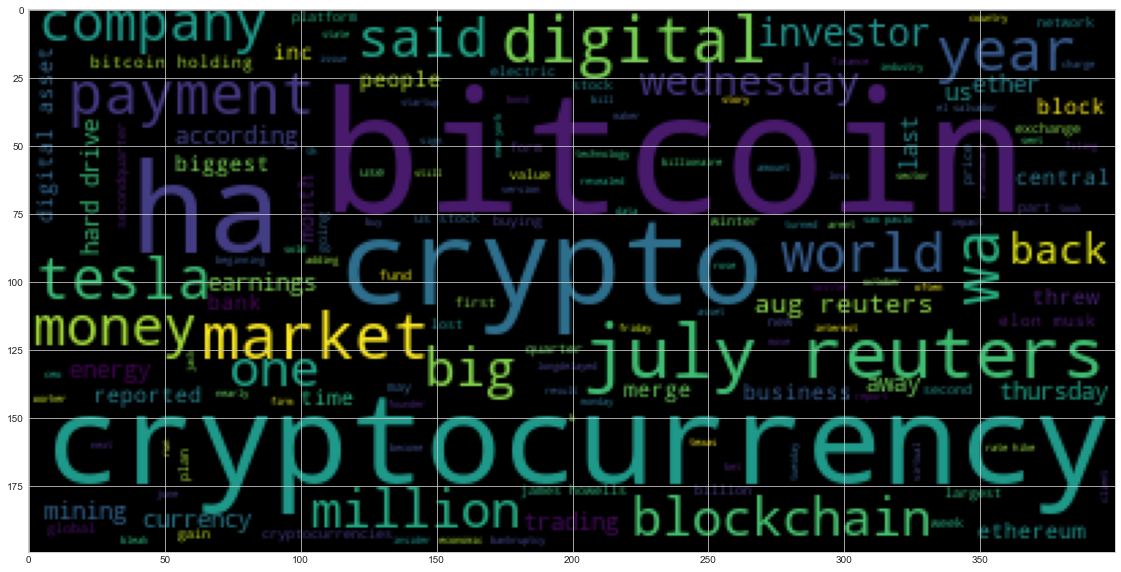

In [22]:
# Generate the Bitcoin word cloud
wc_input = ' '.join(btc_tokens_list_1D)
wc = WordCloud().generate(wc_input)
plt.imshow(wc)

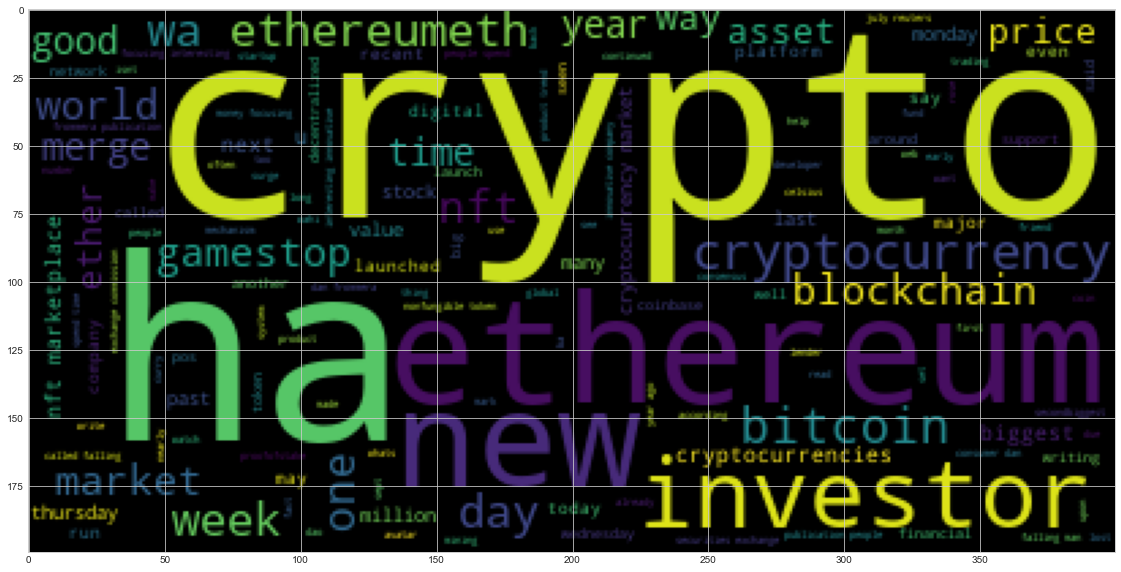

In [23]:
# Generate the Ethereum word cloud
wc_input = ' '.join(eth_tokens_list_1D)
wc = WordCloud().generate(wc_input)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-08 20:17:37.440641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-08 20:17:37.440690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-08 20:17:43.551325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-08 20:17:43.553076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-08-08 20:17:43.554214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-08-08 20:17:43.555372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_bigstring = ' '.join(btc_tokens_list_1D)
btc_bigstring

'wa morning june bill stewart ceo mainebased bitcoin mining business dynamics mining received call one employee hes like every machine inside tools trace cryptocurrencies last several year allowed law enforcement agency convict dark web black market administrator recover million ransomware payment seiz miners voluntarily powered energy demand price spiked aerial view whinstone us bitcoin mining facility rockdale texas october th long shed north ameri got ta hand people impetuous even face extraordinary odds imagine looking single hard drive amidst literal heap trash well thats one uk man goal people russia soon longer allowed use digital asset form payment russian president vladimir putin ha signed bill law prohibiting use digital asset elon muskowned electric vehicle making company tesla ha sold significant amount bitcoin holding firm said statement reporting earnings q company said posted bitcoin high blockchain bridge low world biggest technology company freezing job round week big 

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_bigstring)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
btc_doc.ents

(morning,
 june,
 bill stewart,
 last several year,
 texas,
 october,
 one,
 russia,
 russian,
 vladimir putin,
 july,
 reuters,
 million,
 second quarter,
 reuters,
 month,
 month,
 july,
 october,
 july,
 saturday,
 year,
 wednesday,
 billion,
 july,
 reuters,
 two,
 july,
 may sweat month,
 new york,
 july,
 reuters,
 late wednesday,
 tesla inc tslao,
 wednesday,
 democrats,
 july,
 one,
 today,
 last year,
 last month,
 el salvador,
 tuesday,
 billion,
 la microstrategys,
 michael saylor,
 quarterly,
 first,
 cnn,
 bell newsletter subscriber sign,
 testthis week,
 phong le,
 one,
 jack dorseythe,
 july,
 reuters,
 mexican,
 new york,
 july,
 reuters,
 texas,
 african,
 kristy kilburn,
 new york,
 july,
 reuters us securities exchange commission,
 tuesday,
 friday,
 winter,
 el salvador,
 million,
 mexico,
 british,
 reuters jack,
 block inc sqn,
 thursday,
 second quarter,
 wednesday,
 last quarter,
 monday,
 first,
 june,
 matt turner,
 weekly,
 storieson agenda,
 ben tobin,
 reut

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_bigstring = ' '.join(eth_tokens_list_1D)
eth_bigstring

'nonfungible token nft market ha fallen cliff thats stopping instagram doubling digital collectible test launch may app expanding nf day week ending letter inevitably mean news anothermessysaga cryptocurrency world securities exchange commission ha charged peopl less two week soft launch gamestops nft marketplace already courting controversy among nfts listed platform artwork called falling man wa spotted web ethereum merge significant people crypto work one form another since longdelayed merge see second biggest blockchain reduce car ethereum bitcoin nearly become household name however theyre often mentioned tandem theyre far samebitcoin wa created alternative decentralized currency whether cryptocurrency ethereum merge big deal work since longdelayed merge see ethereum secondbiggest blockchain behind bitcoin become nearly ethereum improve upon scalability completion socalled surge cofounder vitalik buterin said thursdayat ethereum community conference paris addressed overall crypto 

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_bigstring)


# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [34]:
# List all Entities
eth_doc.ents

(day week,
 two week,
 second,
 cofounder,
 buterin,
 thursdayat ethereum community,
 paris,
 jon von tetzchner,
 april,
 last month,
 one,
 july,
 saturday,
 year july,
 reuters,
 past hour,
 nirv stablecoin,
 monday,
 stephen curry,
 kitchen counter,
 one,
 anthony scaramuccis,
 one,
 july,
 reuters,
 thursday,
 new york,
 reuters,
 wednesday,
 first,
 wednesday,
 one,
 nft,
 stakingcrypto,
 recent year,
 today,
 every day,
 mov,
 winter,
 second,
 around past seven day,
 today,
 july,
 phil,
 five decade,
 year ago,
 los angeles,
 monday,
 first,
 june,
 monday,
 million million,
 recent week,
 nft,
 digital,
 yacht club,
 million,
 two,
 one,
 ada,
 thursday,
 meta long bull,
 mark zuckerberg,
 eight year old,
 thursday,
 monday,
 week,
 july,
 thursday,
 sameer ramani,
 many year,
 mark zuckerbergmeta,
 september,
 han decade,
 november,
 american,
 new york,
 year ago,
 mark zuckerberg,
 one,
 one day,
 early afternoon,
 happenedsaturday,
 day little half,
 one,
 past two year,
 

---